In [3]:
import pandas as pd
import matplotlib
import mysql.connector as mysql
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import googlemaps
import folium
import tqdm

# import koreanize_matplotlib


In [4]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [12]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
            SELECT 
    co.comp_name, 
    co.foundation, 
    te.tech_name,
    count(te.tech_name) as count
FROM 
    company_info co
INNER JOIN prefer_tech pr ON co.comp_id = pr.comp_id
INNER JOIN tech_info te ON pr.tech_id = te.tech_id
WHERE 
    co.foundation > 0
    AND te.tech_name IN (
        SELECT te.tech_name
        FROM company_info co
        INNER JOIN essential_tech es ON co.comp_id = es.comp_id
        INNER JOIN tech_info te ON es.tech_id = te.tech_id
        WHERE te.tech_name != "정보없음"
        GROUP BY te.tech_name
        
    )
GROUP BY co.comp_name, co.foundation, te.tech_name
ORDER BY foundation DESC;




""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df.head()

,0,1,2,3
0,메디스비,2024,MATLAB,2
1,메디스비,2024,UART,2
2,엘라인,2023,MATLAB,1
3,잇츠센서,2023,MATLAB,1
4,라이온로보틱스,2023,R&D,2


In [13]:
df.columns = ["회사명", "설립일", "기술", "수"]

df

,회사명,설립일,기술,수
0,메디스비,2024,MATLAB,2
1,메디스비,2024,UART,2
2,엘라인,2023,MATLAB,1
3,잇츠센서,2023,MATLAB,1
4,라이온로보틱스,2023,R&D,2
...,...,...,...,...
114,지아이티,1997,CAN,2
115,앤씨앤,1997,MATLAB,1
116,앤씨앤,1997,Redis,1
117,경신,1974,Javascript,1


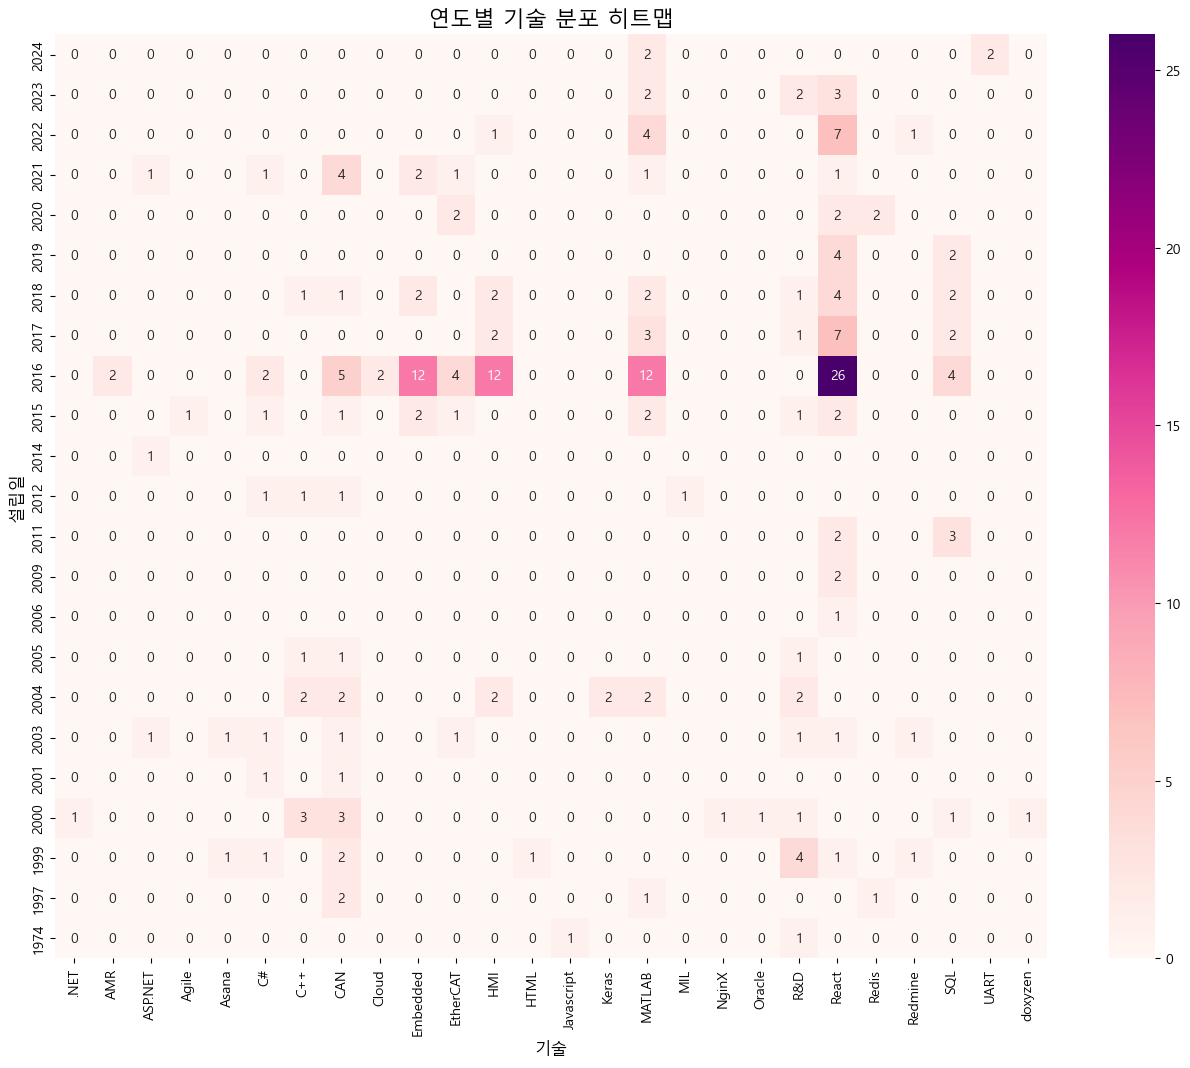

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')  # 한글 폰트 설정

# 히트맵용 데이터 준비: 기술별 설립일 합계
heatmap_data = df.pivot_table(index="설립일", columns="기술", values="수", aggfunc="sum", fill_value=0)

# 설립일 역순으로 정렬
heatmap_data = heatmap_data.sort_index(ascending=False)

# 히트맵 생성
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="RdPu", cbar=True)
plt.title("연도별 기술 분포 히트맵", fontsize=16)
plt.xlabel("기술", fontsize=12)
plt.ylabel("설립일", fontsize=12)
plt.show()


C:\Users\NDY\AppData\Local\Temp\ipykernel_22160\1306524763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="기술", y="수", palette="RdPu")


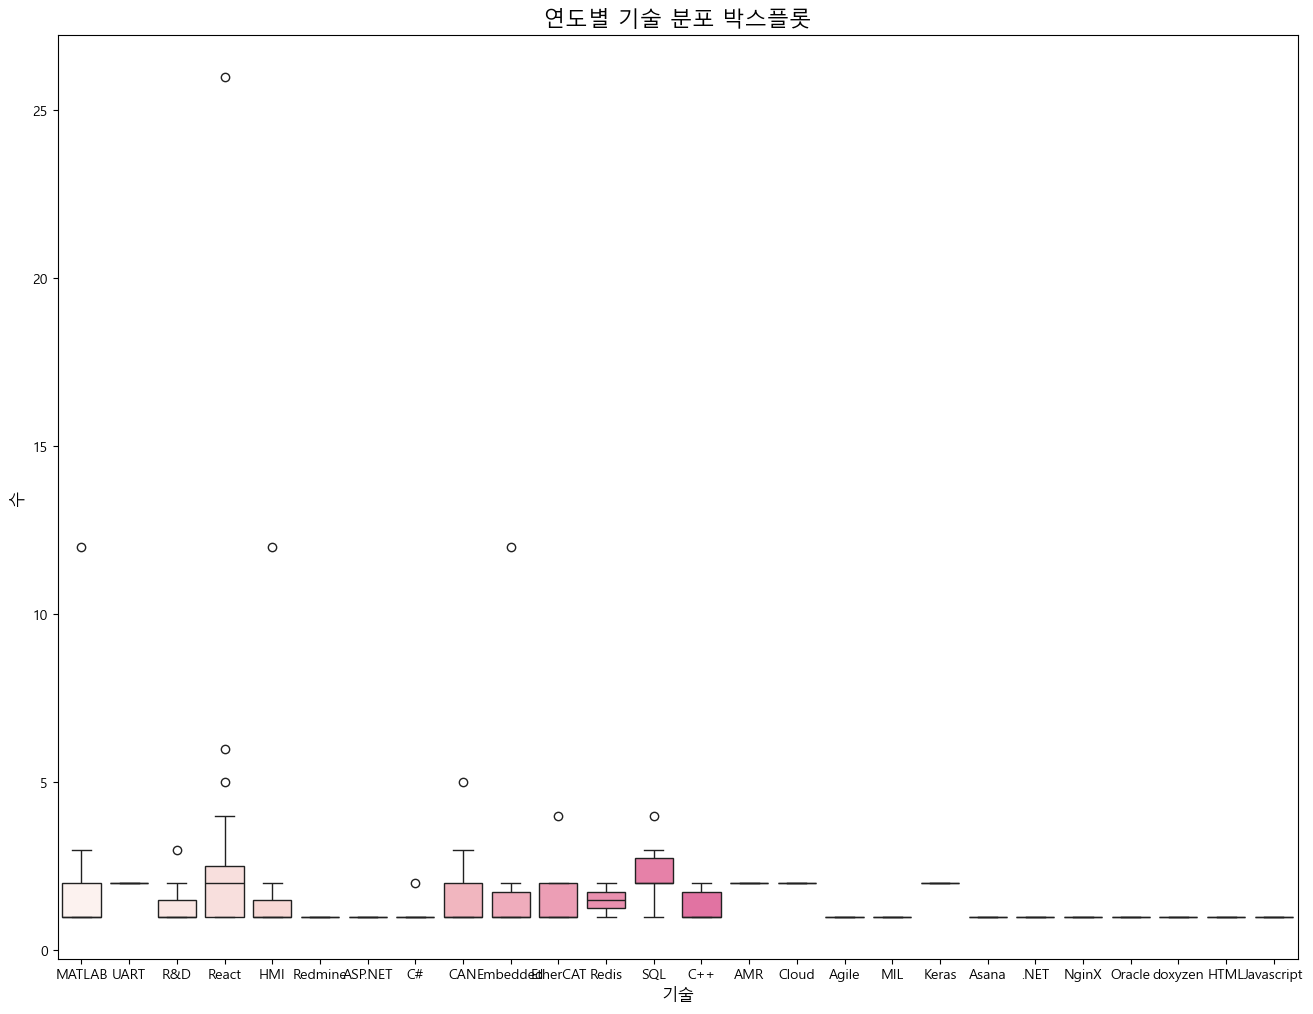

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

# 박스플롯 생성
plt.figure(figsize=(16, 12))
sns.boxplot(data=df, x="기술", y="수", palette="RdPu")

# 제목 및 레이블 설정
plt.title("연도별 기술 분포 박스플롯", fontsize=16)
plt.xlabel("기술", fontsize=12)
plt.ylabel("수", fontsize=12)

# 그래프 표시
plt.show()


In [17]:
remote.close()